In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df = pd.read_csv('lending_data.csv')

# Review the DataFrame
df.info()

df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [3]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df['loan_status']

# Separate the X variable, the features
X = df.drop(columns = 'loan_status')


In [4]:
# Review the y variable Series
y[:5]


0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [5]:
# Review the X variable DataFrame
X.head(5)


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [6]:
# Check the balance of our target values
y.value_counts()


0    75036
1     2500
Name: loan_status, dtype: int64

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [7]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [8]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
classifier = LogisticRegression(random_state=1)

# Fit the model using training data
classifier.fit(X_train, y_train)


LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [9]:
# Make a prediction using the testing data
# Predict outcomes for test data set
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})


,Prediction,Actual
60914,0,0
36843,0,0
1966,0,0
70137,0,0
27237,0,0
...,...,...
45639,0,0
11301,0,0
51614,0,0
4598,0,0


### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [10]:
# Print the balanced_accuracy score of the model
from sklearn.metrics import accuracy_score

# Display the accuracy score for the test dataset.
accuracy_score(y_test, predictions)


0.9918489475856377

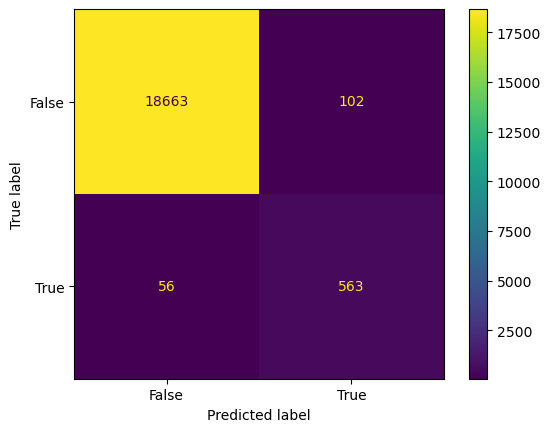

In [11]:
# Generate a confusion matrix for the model
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()


In [12]:
# Print the classification report for the model
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.85      0.91      0.88       619

    accuracy                           0.99     19384
   macro avg       0.92      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:**
Out of all the candidates that the model predicted would be a risky loan, 85% of them were actually a risky loan.

Out of all the candidates that were a risky loan, this model predicted this outcome correctly with probability ~0.91.

The F1 score on predicting if someone was a healthy loan candidate is 1.00, compared to 0.88 for risky loan candidates. This means that the model is better a predicting if someone is a healthy loan candidate, than if they're a risky loan candidate. A risk intolerant loaner should feel very confident loaning to an individual who is identified as a 'healthy candidate', and should feel pretty confident that they aren't missing out on a potentially healthy loan candidate that they avoided because the model identified them as risky.


---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [13]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
ros = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X_res, y_res = ros.fit_resample(X_train, y_train)


In [14]:
# Count the distinct values of the resampled labels data
y_res.value_counts()


0    56271
1    56271
Name: loan_status, dtype: int64

### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [15]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
classifier = LogisticRegression(random_state=1)

# Fit the model using training data
classifier.fit(X_res, y_res)

# Make a prediction using the testing data
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})


,Prediction,Actual
60914,0,0
36843,0,0
1966,0,0
70137,0,0
27237,0,0
...,...,...
45639,0,0
11301,0,0
51614,0,0
4598,0,0


### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [16]:
# Display the accuracy score for the test dataset.
accuracy_score(y_test, predictions)


0.9938093272802311

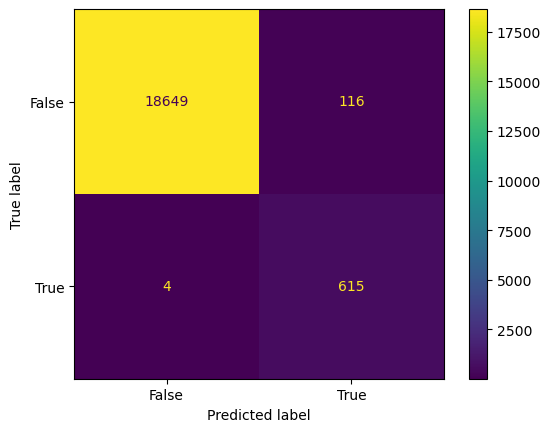

In [17]:
# Generate a confusion matrix for the model
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()


In [18]:
# Print the classification report for the model
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.99      0.91       619

    accuracy                           0.99     19384
   macro avg       0.92      0.99      0.95     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** Out of all the candidates that the model predicted would be a risky loan, 84% of them were actually a risky loan. This is a negligibly worse performance than with the non-oversampled model.

Out of all the candidates that were a risky loan, this model predicted this outcome correctly with probability ~0.99. This is a meaningfully improved performance than with the non-oversampled model.

The F1 score with respect to healthy candidate prediction remains near 1.00, given random over-sampling. However, the ROS marginally improved F1 performance from 0.88 to 0.91 with respect to risky loans. This marginal improvement could lead to marginally better performance in terms of not accidentally rejecting what could be an otherwise healthy loan candidate.